# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy


     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     ------------------------------------- 675.6/675.6 kB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675976 sha256=5042d9594324438a6e274788dcd1ebb943ad8a18fd4a74e79f04f17acd87de24
  Stored in directory: c:\users\antho\appdata\local\pip\cache\wheels\e9\27\5f\7defd70aaec29af33fe5e2110843e14dcfc44cba710a0dd957
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

weather_api_key = "b4758c7e9b2e2551f240c3bf04fe8956"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response.raise_for_status()
        city_weather = response.json()
        city_weather = requests.get(city_url).json()

        if "coord" in city_weather and "main" in city_weather:
            print(f"City: {city}")
            print(f"Weather: {city_weather}")
        else:
            print(f"City not found: {city}")
            continue
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat", None)
        city_lng = city_weather.get("coord", {}).get("lon", None)
        city_max_temp = city_weather.get("main", {}).get("temp_max", None)
        city_humidity = city_weather.get("main", {}).get("humidity", None)
        city_clouds = city_weather.get("clouds", {}).get("all", None)
        city_wind = city_weather.get("wind", {}).get("speed", None)
        city_country = city_weather.get("sys", {}).get("country", None)
        city_date = city_weather.get("dt", None)

        # Append the City information into city_data list
        if city_lat and city_lng and city_max_temp and city_humidity and city_clouds and city_wind and city_country and city_date:
            city_data.append({"City": city,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
City: ushuaia
Weather: {'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 12.81, 'feels_like': 11.66, 'temp_min': 12.81, 'temp_max': 12.81, 'pressure': 1006, 'humidity': 58, 'sea_level': 1006, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 220}, 'clouds': {'all': 40}, 'dt': 1736029753, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1735977895, 'sunset': 1736039475}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
Processing Record 2 of Set 1 | grytviken
City: grytviken
Weather: {'coord': {'lon': -36.5092, 'lat': -54.2811}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 4.23, 'feels_like': 0.01, 'temp_min': 4.23, 'temp_max': 4.23, 'pressure

KeyboardInterrupt: 

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          22
Lat           22
Lng           22
Max Temp      22
Humidity      22
Cloudiness    22
Wind Speed    22
Country       22
Date          22
dtype: int64


In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,12.81,58,40,4.12,AR,1736029753
1,grytviken,-54.2811,-36.5092,4.23,67,15,5.79,GS,1736029754
2,talodi,10.6325,30.3797,26.06,22,27,2.55,SD,1736029755
3,port-aux-francais,-49.3500,70.2167,5.80,82,73,11.92,TF,1736029757
4,novyy urgal,51.0736,132.5642,-36.78,99,100,0.70,RU,1736029758


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,12.81,58,40,4.12,AR,1736029753
1,grytviken,-54.2811,-36.5092,4.23,67,15,5.79,GS,1736029754
2,talodi,10.6325,30.3797,26.06,22,27,2.55,SD,1736029755
3,port-aux-francais,-49.3500,70.2167,5.80,82,73,11.92,TF,1736029757
4,novyy urgal,51.0736,132.5642,-36.78,99,100,0.70,RU,1736029758


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

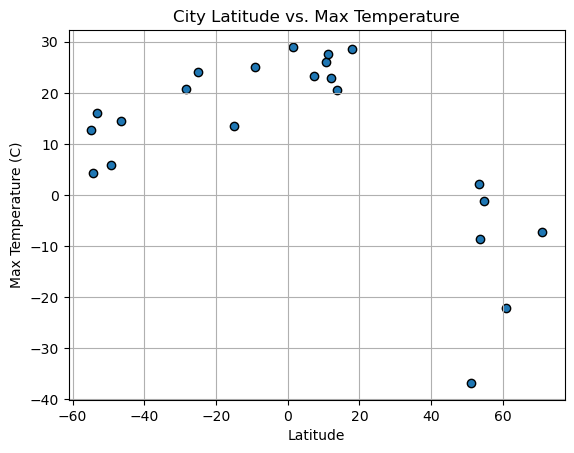

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

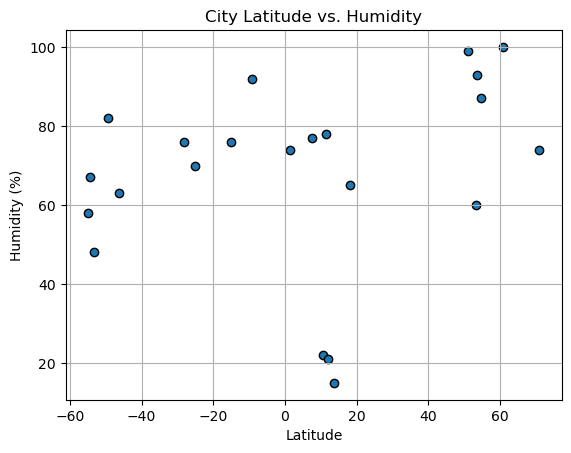

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

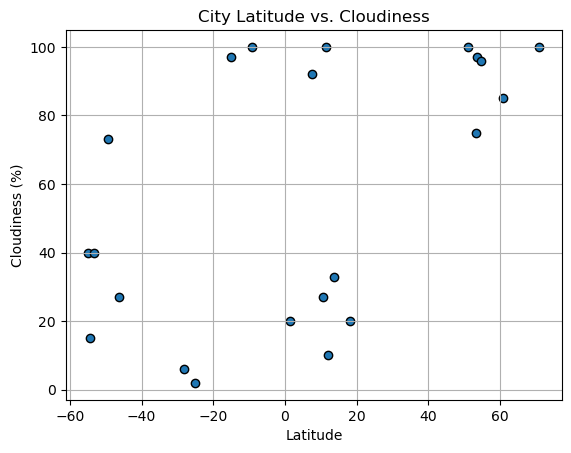

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

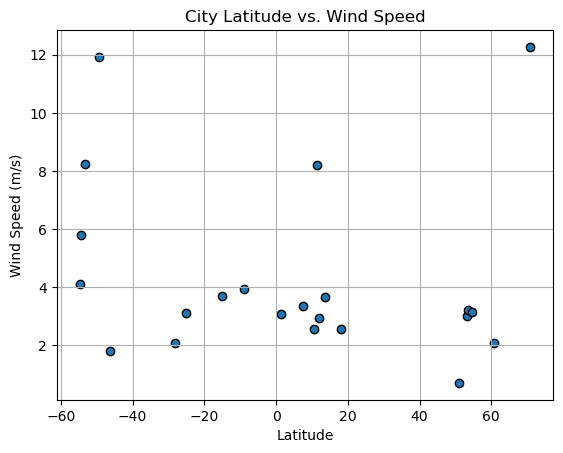

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the regression equation and r-squared value
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR² = {rvalue**2:.2f}", text_coordinates, fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show plot
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,talodi,10.6325,30.3797,26.06,22,27,2.55,SD,1736029755
4,novyy urgal,51.0736,132.5642,-36.78,99,100,0.70,RU,1736029758
6,kalmunai,7.4167,81.8167,23.20,77,92,3.35,LK,1736029761
7,yelizovo,53.1873,158.3805,2.08,60,75,3.00,RU,1736029762
9,strezhevoy,60.7333,77.5889,-22.13,100,85,2.09,RU,1736029765


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,12.81,58,40,4.12,AR,1736029753
1,grytviken,-54.2811,-36.5092,4.23,67,15,5.79,GS,1736029754
3,port-aux-francais,-49.3500,70.2167,5.80,82,73,11.92,TF,1736029757
5,coracora,-15.0333,-73.7833,13.54,76,97,3.71,PE,1736029759
8,punta arenas,-53.1500,-70.9167,16.06,48,40,8.23,CL,1736029763


###  Temperature vs. Latitude Linear Regression Plot

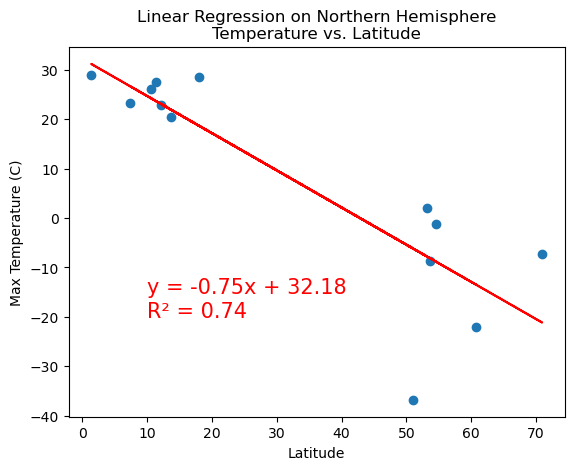

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temperature (C)", "Linear Regression on Northern Hemisphere\nTemperature vs. Latitude", (10, -20))

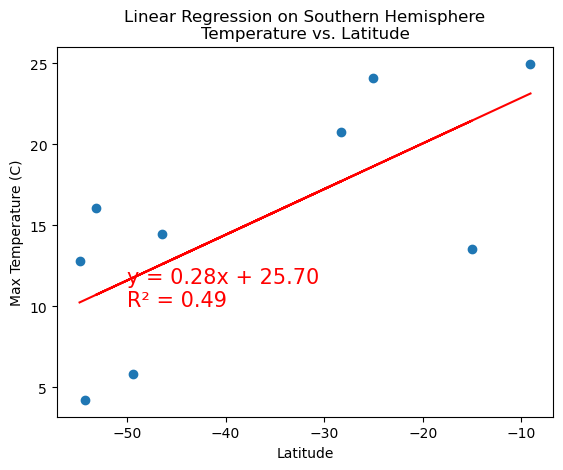

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temperature (C)", "Linear Regression on Southern Hemisphere\nTemperature vs. Latitude", (-50, 10))

**Discussion about the linear relationship:** In the Southern Hemisphere, a negative correlation is prevelant, reinforcing the trend that higher latitudes are associated with lower temperatures.

### Humidity vs. Latitude Linear Regression Plot

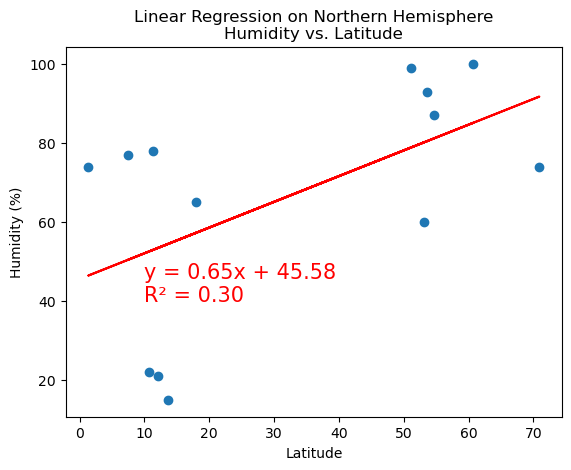

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Linear Regression on Northern Hemisphere\nHumidity vs. Latitude", (10, 40))

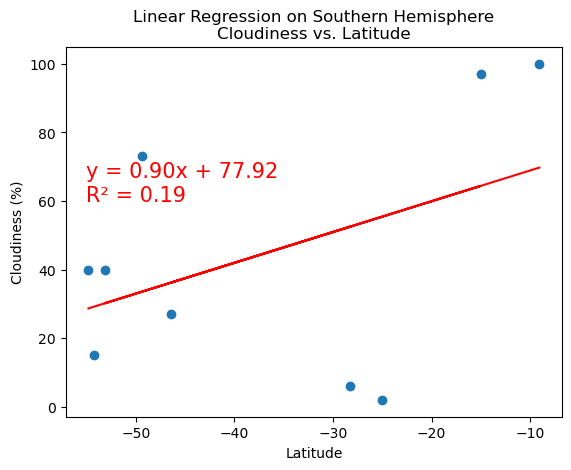

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Linear Regression on Southern Hemisphere\nCloudiness vs. Latitude", (-55, 60))

### Cloudiness vs. Latitude Linear Regression Plot

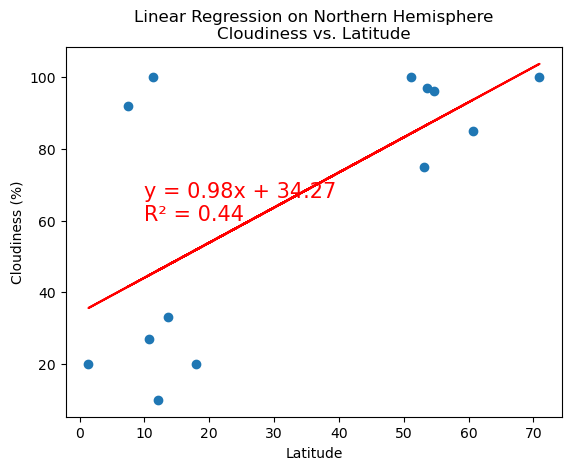

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Linear Regression on Northern Hemisphere\nCloudiness vs. Latitude", (10, 60))

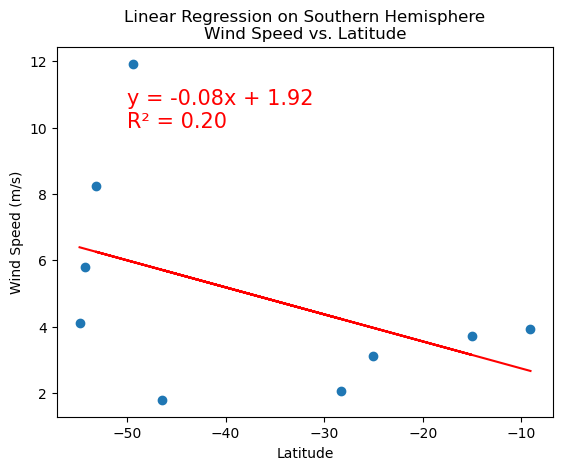

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Linear Regression on Southern Hemisphere\nWind Speed vs. Latitude", (-50, 10))

**Discussion about the linear relationship:** The slight positive correlation in the Northern Hemisphere suggests wind speed increases slightly as we move north, while a slight negative correlation in the Southern Hemisphere suggests wind speed decreases slightly as we move south. In both cases, the weak correlations indicate that other factors likely play a significant role in influencing wind speed.

### Wind Speed vs. Latitude Linear Regression Plot

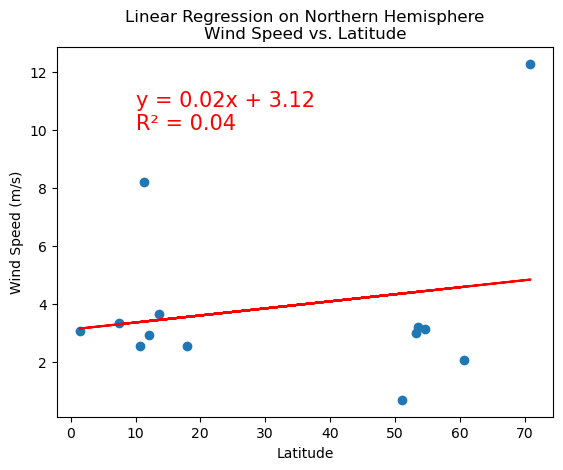

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Linear Regression on Northern Hemisphere\nWind Speed vs. Latitude", (10, 10))

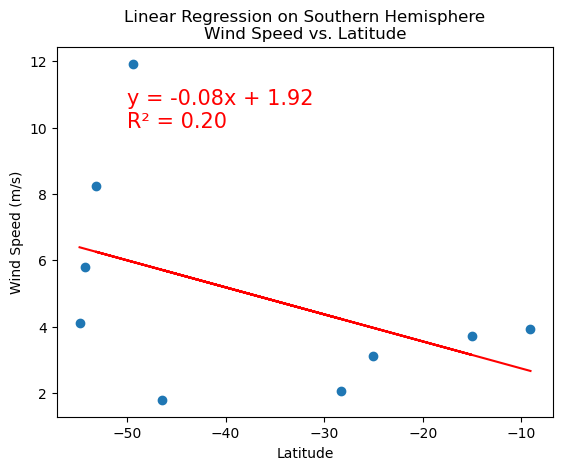

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Linear Regression on Southern Hemisphere\nWind Speed vs. Latitude", (-50, 10))

**Discussion about the linear relationship:** The analysis shows a weak link between latitude and wind speed in both hemispheres. In the Northern Hemisphere, wind speed tends to increase slightly as you move north, while in the Southern Hemisphere, it decreases slightly as you move south. However, the connection is not strong in either case, suggesting that other factors have a bigger influence on wind speed.